In [1]:
import pandas as pd
from collections import defaultdict
import warnings
import visualize
import neat
import multiprocessing
import os
import matplotlib.pyplot as plt

import numpy as np

In [2]:
df = pd.read_csv('sat.trn',header=None,sep = '\s')

In [3]:
X = df.iloc[:,:-1].to_numpy()
y = df.iloc[:,-1].to_numpy()

# 7-> 6 and 1-6 -> 0:5
y[y==7] = 6
for i in range(6):
    y[y == (i + 1)] = i

In [4]:
def softmax(x, axis=1):
    # 计算每行的最大值
    row_max = x.max(axis=axis)
 
    # 每行元素都需要减去对应的最大值，否则求exp(x)会溢出，导致inf情况
    row_max=row_max.reshape(-1, 1)
    x = x - row_max
 
    # 计算e的指数次幂
    x_exp = np.exp(x)
    x_sum = np.sum(x_exp, axis=axis, keepdims=True)
    s = x_exp / x_sum
    return s

In [5]:
def get_winner(class1):
    
    numbers = [*range(6)] # number 2 > number 1
    number_of_classification = len(numbers)

    list_y = y.tolist()
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

        
    class2 = []

    class1_indexes = []
    class2_indexes = []

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)

    print("number of class1:{}".format(len(class1_label)))
    print("number of class2:{}".format(len(class2_label)))

    samplesize = 4435
    x_inputs =[tuple(c) for c in X[class1_indexes].tolist()] + [tuple(c) for c in X[class2_indexes].tolist()]
    x_outputs = [tuple([c]) for c in class1_label + class2_label]
    
    
    def eval_genomes(genomes, config):
        for genome_id, genome in genomes:
            net = neat.nn.FeedForwardNetwork.create(genome, config)

            outputs = []
            for xi in x_inputs:
                output = net.activate(xi)
                outputs.append(output)


            px_outputs = softmax(np.array(outputs).reshape(samplesize, 2), axis=1)
            # the index of maximum in each line
            pred_outputs = np.argmax(px_outputs, axis = 1)
            real_outputs = np.array(x_outputs).reshape(samplesize,)

            acc = np.sum(pred_outputs == real_outputs)/samplesize

            genome.fitness = acc

    def run(config_file):
        # Load configuration.
        config = neat.Config(
            neat.DefaultGenome,
            neat.DefaultReproduction,
            neat.DefaultSpeciesSet,
            neat.DefaultStagnation,
            config_file,
        )

        # Create the population, which is the top-level object for a NEAT run.
        p = neat.Population(config)

        # add a stdout reporter to show progress in the terminal
        reporter = neat.StdOutReporter(False)
        p.add_reporter(reporter)
        stats = neat.StatisticsReporter()
        p.add_reporter(stats)
        #checkpointer = neat.Checkpointer(100)
        #p.add_reporter(checkpointer)
        # Run for up to 300 generations.
        winner = p.run(eval_genomes, 10)

        return [stats, winner]
    
    local_dir = os.getcwd()
    config_path = os.path.join(local_dir, "config-feedforward-satellite2")
    [stats, winner] = run(config_path)
    
    return winner

In [6]:
number_codes = []
for i in range(2**5, 2**6-1):
    for j in bin(i).split('b')[1]:
        number_codes.append(int(j))
number_codes = np.array(number_codes).reshape(2**5 - 1,6).T.tolist() 

In [7]:
classes = []
for i in range(2**5 - 1):
    code_list = np.array(number_codes).T[i]
    classes.append(np.where(code_list==1)[0].tolist())

In [10]:
winner_list = []
#classes = [[0],[0,5],[0,4],[0,4,5],[0,3],[0,3,5],[0,3,4],[0,3,4,5],[0,2],[0,2,5],[0,2,4],[0,2,4,5],[0,2,3],[0,2,3,5],[0,2,3,4],[0,2,3,4,5],[0,1],[0,1,5],[0,1,4],[0,1,4,5],[0,1,3],[0,1,3,5],[0,1,3,4],[0,1,3,4,5],[0,1,2],[0,1,2,5],[0,1,2,4],[0,1,2,4,5],[0,1,2,3],[0,1,2,3,5],[0,1,2,3,4]]

for class1 in classes:
    winner = get_winner(class1)
    winner_list.append(winner)

number of class1:1072
number of class2:3363

 ****** Running generation 0 ****** 

Population's average fitness: 0.62525 stdev: 0.21462
Best fitness: 0.85186 - size: (2, 7) - species 5 - id 19
Average adjusted fitness: 0.373
Mean genetic distance 2.843, standard deviation 0.530
Population of 200 members in 17 species
Total extinctions: 0
Generation time: 12.772 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.65940 stdev: 0.19520
Best fitness: 0.85186 - size: (2, 7) - species 7 - id 19
Average adjusted fitness: 0.429
Mean genetic distance 2.998, standard deviation 0.576
Population of 204 members in 20 species
Total extinctions: 0
Generation time: 12.690 sec (12.731 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.69056 stdev: 0.16917
Best fitness: 0.85186 - size: (2, 7) - species 7 - id 19
Average adjusted fitness: 0.511
Mean genetic distance 3.013, standard deviation 0.561
Population of 203 members in 23 species
Total extinction

Population's average fitness: 0.58940 stdev: 0.13716
Best fitness: 0.85051 - size: (2, 7) - species 23 - id 185
Average adjusted fitness: 0.360
Mean genetic distance 2.833, standard deviation 0.524
Population of 208 members in 27 species
Total extinctions: 0
Generation time: 11.995 sec (11.058 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.59723 stdev: 0.13059
Best fitness: 0.85051 - size: (2, 7) - species 23 - id 185
Average adjusted fitness: 0.250
Mean genetic distance 2.823, standard deviation 0.528
Population of 202 members in 27 species
Total extinctions: 0
Generation time: 12.275 sec (11.260 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.58732 stdev: 0.14237
Best fitness: 0.85051 - size: (2, 7) - species 23 - id 185
Average adjusted fitness: 0.394
Mean genetic distance 2.806, standard deviation 0.527
Population of 198 members in 27 species
Total extinctions: 0
Generation time: 11.929 sec (11.356 average)

 ****** R

Population's average fitness: 0.60015 stdev: 0.13522
Best fitness: 0.83743 - size: (3, 8) - species 22 - id 1458
Average adjusted fitness: 0.417
Mean genetic distance 3.034, standard deviation 0.563
Population of 199 members in 27 species
Total extinctions: 0
Generation time: 16.210 sec (14.915 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.59449 stdev: 0.14033
Best fitness: 0.84104 - size: (4, 10) - species 22 - id 1602
Average adjusted fitness: 0.263
Mean genetic distance 3.012, standard deviation 0.558
Population of 199 members in 27 species
Total extinctions: 0
Generation time: 18.105 sec (15.234 average)
number of class1:2525
number of class2:1910

 ****** Running generation 0 ****** 

Population's average fitness: 0.47095 stdev: 0.07168
Best fitness: 0.72469 - size: (2, 7) - species 3 - id 3
Average adjusted fitness: 0.172
Mean genetic distance 2.904, standard deviation 0.505
Population of 200 members in 20 species
Total extinctions: 0
Generation 

Population's average fitness: 0.55296 stdev: 0.17854
Best fitness: 0.77159 - size: (3, 9) - species 7 - id 346
Average adjusted fitness: 0.293
Mean genetic distance 2.977, standard deviation 0.479
Population of 203 members in 31 species
Total extinctions: 0
Generation time: 11.451 sec (10.698 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.56990 stdev: 0.17137
Best fitness: 0.77159 - size: (3, 9) - species 7 - id 346
Average adjusted fitness: 0.320
Mean genetic distance 3.013, standard deviation 0.485
Population of 204 members in 33 species
Total extinctions: 0
Generation time: 11.756 sec (10.963 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.58633 stdev: 0.16863
Best fitness: 0.77159 - size: (3, 9) - species 7 - id 346
Average adjusted fitness: 0.339
Mean genetic distance 3.001, standard deviation 0.491
Population of 198 members in 34 species
Total extinctions: 0
Generation time: 12.187 sec (11.208 average)

 ****** Runn


Population's average fitness: 0.56216 stdev: 0.21416
Best fitness: 0.85502 - size: (3, 9) - species 27 - id 1118
Average adjusted fitness: 0.366
Mean genetic distance 3.024, standard deviation 0.526
Population of 200 members in 33 species
Total extinctions: 0
Generation time: 14.179 sec (12.522 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.57002 stdev: 0.21076
Best fitness: 0.85502 - size: (3, 9) - species 27 - id 1118
Average adjusted fitness: 0.313
Mean genetic distance 3.044, standard deviation 0.524
Population of 204 members in 33 species
Total extinctions: 0
Generation time: 14.416 sec (12.759 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.57808 stdev: 0.21212
Best fitness: 0.85502 - size: (3, 9) - species 27 - id 1118
Average adjusted fitness: 0.334
Mean genetic distance 3.024, standard deviation 0.515
Population of 202 members in 33 species
Total extinctions: 0
Generation time: 14.815 sec (12.987 average)

 ****


 ****** Running generation 0 ****** 

Population's average fitness: 0.47506 stdev: 0.06392
Best fitness: 0.73281 - size: (2, 7) - species 2 - id 48
Average adjusted fitness: 0.206
Mean genetic distance 2.914, standard deviation 0.496
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 10.661 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.51018 stdev: 0.07922
Best fitness: 0.73281 - size: (2, 7) - species 8 - id 48
Average adjusted fitness: 0.221
Mean genetic distance 2.957, standard deviation 0.506
Population of 199 members in 28 species
Total extinctions: 0
Generation time: 11.485 sec (11.073 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.51722 stdev: 0.08343
Best fitness: 0.73281 - size: (2, 7) - species 2 - id 48
Average adjusted fitness: 0.323
Mean genetic distance 3.005, standard deviation 0.494
Population of 199 members in 36 species
Total extinctions: 0
Generation time: 12.236 sec (11.461 ave


 ****** Running generation 4 ****** 

Population's average fitness: 0.55843 stdev: 0.15912
Best fitness: 0.75468 - size: (5, 13) - species 6 - id 702
Average adjusted fitness: 0.288
Mean genetic distance 3.013, standard deviation 0.537
Population of 197 members in 28 species
Total extinctions: 0
Generation time: 13.424 sec (12.199 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.58144 stdev: 0.15567
Best fitness: 0.75468 - size: (5, 13) - species 6 - id 702
Average adjusted fitness: 0.313
Mean genetic distance 3.034, standard deviation 0.533
Population of 203 members in 28 species
Total extinctions: 0
Generation time: 13.423 sec (12.403 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.56293 stdev: 0.16217
Best fitness: 0.75468 - size: (5, 13) - species 6 - id 702
Average adjusted fitness: 0.297
Mean genetic distance 3.035, standard deviation 0.536
Population of 203 members in 29 species
Total extinctions: 0
Generation time:

Population's average fitness: 0.61563 stdev: 0.15678
Best fitness: 0.93348 - size: (3, 10) - species 3 - id 898
Average adjusted fitness: 0.510
Mean genetic distance 3.048, standard deviation 0.533
Population of 201 members in 26 species
Total extinctions: 0
Generation time: 14.565 sec (13.025 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.63623 stdev: 0.14689
Best fitness: 0.93348 - size: (3, 10) - species 3 - id 898
Average adjusted fitness: 0.357
Mean genetic distance 3.091, standard deviation 0.515
Population of 200 members in 27 species
Total extinctions: 0
Generation time: 14.313 sec (13.154 average)
number of class1:2589
number of class2:1846

 ****** Running generation 0 ****** 

Population's average fitness: 0.45385 stdev: 0.06536
Best fitness: 0.59436 - size: (2, 7) - species 1 - id 69
Average adjusted fitness: 0.155
Mean genetic distance 2.888, standard deviation 0.446
Population of 199 members in 26 species
Total extinctions: 0
Generation ti


Population's average fitness: 0.56314 stdev: 0.16968
Best fitness: 0.70891 - size: (3, 9) - species 11 - id 533
Average adjusted fitness: 0.259
Mean genetic distance 2.884, standard deviation 0.487
Population of 200 members in 22 species
Total extinctions: 0
Generation time: 12.499 sec (12.535 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.57262 stdev: 0.16736
Best fitness: 0.70891 - size: (3, 9) - species 11 - id 533
Average adjusted fitness: 0.264
Mean genetic distance 2.918, standard deviation 0.502
Population of 201 members in 25 species
Total extinctions: 0
Generation time: 12.062 sec (12.417 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.57432 stdev: 0.16870
Best fitness: 0.71725 - size: (3, 9) - species 4 - id 864
Average adjusted fitness: 0.277
Mean genetic distance 2.914, standard deviation 0.496
Population of 197 members in 26 species
Total extinctions: 0
Generation time: 13.732 sec (12.680 average)

 ****** R

Population's average fitness: 0.58003 stdev: 0.15035
Best fitness: 0.70259 - size: (2, 7) - species 19 - id 39
Average adjusted fitness: 0.231
Mean genetic distance 2.931, standard deviation 0.539
Population of 206 members in 29 species
Total extinctions: 0
Generation time: 13.515 sec (12.750 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.56280 stdev: 0.15486
Best fitness: 0.81917 - size: (5, 12) - species 12 - id 1281
Average adjusted fitness: 0.217
Mean genetic distance 2.966, standard deviation 0.546
Population of 202 members in 30 species
Total extinctions: 0
Generation time: 13.591 sec (12.855 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.56791 stdev: 0.15776
Best fitness: 0.81917 - size: (5, 12) - species 12 - id 1281
Average adjusted fitness: 0.253
Mean genetic distance 2.991, standard deviation 0.549
Population of 201 members in 32 species
Total extinctions: 0
Generation time: 13.440 sec (12.920 average)

 *****

Population's average fitness: 0.47209 stdev: 0.06736
Best fitness: 0.68253 - size: (2, 7) - species 1 - id 194
Average adjusted fitness: 0.221
Mean genetic distance 2.908, standard deviation 0.526
Population of 201 members in 24 species
Total extinctions: 0
Generation time: 10.175 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.51126 stdev: 0.07222
Best fitness: 0.71928 - size: (2, 8) - species 1 - id 332
Average adjusted fitness: 0.305
Mean genetic distance 2.976, standard deviation 0.527
Population of 199 members in 25 species
Total extinctions: 0
Generation time: 15.283 sec (12.729 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.52985 stdev: 0.06679
Best fitness: 0.71928 - size: (2, 8) - species 2 - id 332
Average adjusted fitness: 0.222
Mean genetic distance 2.986, standard deviation 0.541
Population of 201 members in 28 species
Total extinctions: 0
Generation time: 13.312 sec (12.923 average)

 ****** Running generation 3 


Population's average fitness: 0.57696 stdev: 0.15465
Best fitness: 0.77858 - size: (3, 8) - species 2 - id 339
Average adjusted fitness: 0.301
Mean genetic distance 3.101, standard deviation 0.510
Population of 204 members in 41 species
Total extinctions: 0
Generation time: 12.522 sec (11.671 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.58452 stdev: 0.14813
Best fitness: 0.77858 - size: (3, 8) - species 2 - id 339
Average adjusted fitness: 0.254
Mean genetic distance 3.122, standard deviation 0.512
Population of 201 members in 41 species
Total extinctions: 0
Generation time: 12.995 sec (11.892 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.58591 stdev: 0.14744
Best fitness: 0.77858 - size: (3, 8) - species 2 - id 339
Average adjusted fitness: 0.247
Mean genetic distance 3.146, standard deviation 0.521
Population of 199 members in 42 species
Total extinctions: 0
Generation time: 12.657 sec (12.001 average)

 ****** Run

Population's average fitness: 0.59203 stdev: 0.12746
Best fitness: 0.74882 - size: (4, 13) - species 1 - id 949
Average adjusted fitness: 0.286
Mean genetic distance 3.048, standard deviation 0.523
Population of 198 members in 34 species
Total extinctions: 0
Generation time: 12.762 sec (11.990 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.59563 stdev: 0.12694
Best fitness: 0.74882 - size: (4, 13) - species 1 - id 949
Average adjusted fitness: 0.259
Mean genetic distance 3.058, standard deviation 0.507
Population of 204 members in 34 species
Total extinctions: 0
Generation time: 13.128 sec (12.104 average)
number of class1:3965
number of class2:470

 ****** Running generation 0 ****** 

Population's average fitness: 0.31396 stdev: 0.33084
Best fitness: 0.89493 - size: (2, 7) - species 1 - id 196
Average adjusted fitness: 0.198
Mean genetic distance 2.804, standard deviation 0.444
Population of 201 members in 20 species
Total extinctions: 0
Generation ti

In [14]:
local_dir = os.getcwd()
config_path = os.path.join(local_dir, "config-feedforward-satellite2")

config = neat.Config(
    neat.DefaultGenome,
    neat.DefaultReproduction,
    neat.DefaultSpeciesSet,
    neat.DefaultStagnation,
    config_path,
)

In [15]:
test_df = pd.read_csv('sat.tst',header=None,sep = '\s')

testX = test_df.iloc[:,:-1].to_numpy()
testy = test_df.iloc[:,-1].to_numpy()

# 7-> 6 and 1-6 -> 0:5
testy[testy==7] = 6
for i in range(6):
    testy[testy == (i + 1)] = i

In [16]:
def get_pred_real(i, j):
    winner_net = neat.nn.FeedForwardNetwork.create(winner_list[i], config)
    
    numbers = [*range(6)]
    class1 = classes[i]
    class2 = []
    class1_indexes = []
    class2_indexes = []
    
    test_X = testX[j]
    test_y = testy[j]

    list_y = [test_y]
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)


    testsamplesize = 1
    test_x_inputs =[tuple(test_X)]
    test_x_outputs = [tuple([c]) for c in class1_label + class2_label]

    outputs = []
    for xi in test_x_inputs:
        output = winner_net.activate(xi)
        outputs.append(output)

    px_outputs = softmax(np.array(outputs).reshape(testsamplesize, 2), axis=1)
    # the index of maximum in each line
    pred_outputs = np.argmax(px_outputs, axis = 1)
    real_outputs = np.array(test_x_outputs).reshape(testsamplesize,)

    
    return [pred_outputs, real_outputs]

In [17]:
# number_codes = [[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
# [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
# [0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1],
# [0,0,0,0,1,1,1,1,0,0,0,0,1,1,1,1,0,0,0,0,1,1,1,1,0,0,0,0,1,1,1],
# [0,0,1,1,0,0,1,1,0,0,1,1,0,0,1,1,0,0,1,1,0,0,1,1,0,0,1,1,0,0,1],
# [0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0]]

In [18]:
pred_value = []
error_list = []

for j in range(2000):
    pred = []
    for i in range(31):
        [pred_outputs, real_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    
    error = []
    for i in range(6):
        error.append(31 - np.sum(number_codes[i] == np.array(pred).T))
    #print(error)
    
    pred_value.append(np.where(error==np.min(error)))
    error_list.append(np.min(error))
    #print(np.where(error==np.min(error)) )

In [19]:
from random import randint
list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])
np.sum(list_P == testy)/2000

0.7325

In [20]:
for i,p_value in enumerate(pred_value):
    print("#{} min_error:{} index:{} real:{}".format(i, error_list[i], p_value[0], testy[i]))

#0 min_error:7 index:[0] real:2
#1 min_error:7 index:[0] real:2
#2 min_error:7 index:[2] real:3
#3 min_error:7 index:[2] real:3
#4 min_error:8 index:[2 5] real:3
#5 min_error:7 index:[2] real:3
#6 min_error:7 index:[2] real:3
#7 min_error:7 index:[5] real:3
#8 min_error:7 index:[5] real:3
#9 min_error:6 index:[5] real:3
#10 min_error:7 index:[5] real:3
#11 min_error:6 index:[5] real:3
#12 min_error:6 index:[5] real:3
#13 min_error:6 index:[5] real:3
#14 min_error:7 index:[2] real:2
#15 min_error:7 index:[2] real:2
#16 min_error:7 index:[2] real:2
#17 min_error:8 index:[2 5] real:2
#18 min_error:8 index:[2 5] real:2
#19 min_error:8 index:[2 5] real:2
#20 min_error:6 index:[2] real:2
#21 min_error:8 index:[2 5] real:2
#22 min_error:7 index:[2] real:2
#23 min_error:7 index:[5] real:2
#24 min_error:8 index:[2 5] real:2
#25 min_error:7 index:[5] real:2
#26 min_error:7 index:[5] real:2
#27 min_error:10 index:[1 2 4] real:4
#28 min_error:7 index:[5] real:5
#29 min_error:7 index:[5] real:5
#30

#714 min_error:0 index:[1] real:1
#715 min_error:0 index:[1] real:1
#716 min_error:8 index:[2 5] real:2
#717 min_error:7 index:[5] real:2
#718 min_error:7 index:[2] real:2
#719 min_error:7 index:[5] real:2
#720 min_error:7 index:[5] real:2
#721 min_error:7 index:[5] real:2
#722 min_error:5 index:[5] real:5
#723 min_error:3 index:[5] real:5
#724 min_error:3 index:[5] real:5
#725 min_error:4 index:[5] real:5
#726 min_error:5 index:[5] real:5
#727 min_error:5 index:[5] real:5
#728 min_error:6 index:[5] real:5
#729 min_error:3 index:[5] real:5
#730 min_error:3 index:[5] real:5
#731 min_error:3 index:[5] real:5
#732 min_error:5 index:[5] real:5
#733 min_error:7 index:[5] real:5
#734 min_error:10 index:[0 2 4 5] real:4
#735 min_error:9 index:[5] real:4
#736 min_error:8 index:[5] real:5
#737 min_error:6 index:[2] real:3
#738 min_error:8 index:[5] real:3
#739 min_error:6 index:[5] real:4
#740 min_error:5 index:[5] real:3
#741 min_error:0 index:[1] real:1
#742 min_error:0 index:[1] real:1
#743 

In [21]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(list_P, testy)
print(cm)

[[457   1  13   4  25   5]
 [  0 215   0   0  48   1]
 [  4   2 183  54  15  47]
 [  0   0   0   0   0   1]
 [  0   4   2   3  93   3]
 [  0   2 199 150  56 413]]


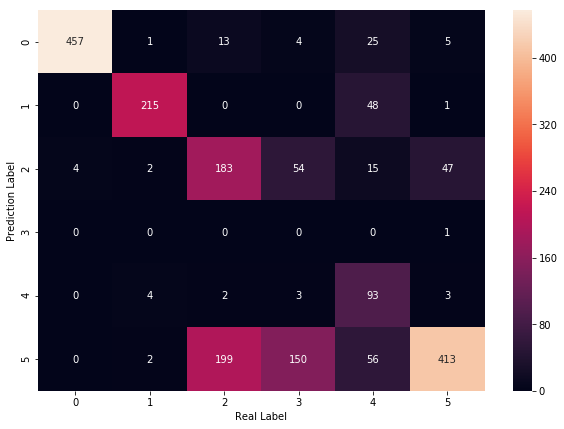

In [22]:
import seaborn as sn

df_cm = pd.DataFrame(cm, index = [i for i in "012345"],
                  columns = [i for i in "012345"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, fmt='.20g', annot=True)
plt.xlabel('Real Label')
plt.ylabel('Prediction Label')
plt.show()